In [3]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pylab import rcParams
from IPython.display import display

from bokeh.io import output_notebook

from utils import METRICS, CONT_PARAMETERS, LOG_PARAMETERS, SET_PARAMETERS, INT_PARAMETERS, shaderdots,\
    unfold_iterations, read_json_log

output_notebook()

Loading BokehJS ...

In [4]:
rcParams['figure.figsize'] = 20, 5
pd.set_option('display.max_columns', None)

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
df = pd.read_pickle('./experiments/single-point-36.pkl')

In [7]:
df.shape

(500000, 80)

In [8]:
best_iteration = df.sort_values('mean_dev_auc').groupby('experiment_id').last()

In [9]:
best_iteration.describe()

,dev_train_diff_auc,dev_train_diff_binary_error,dev_train_diff_binary_logloss,dev_train_diff_kldiv,dev_train_diff_map_10,dev_train_diff_map_100,dev_train_diff_map_1000,iteration,mean_dev_auc,mean_dev_binary_error,mean_dev_binary_logloss,mean_dev_kldiv,mean_dev_map_10,mean_dev_map_100,mean_dev_map_1000,mean_train_auc,mean_train_binary_error,mean_train_binary_logloss,mean_train_kldiv,mean_train_map_10,mean_train_map_100,mean_train_map_1000,mean_validation_auc,mean_validation_binary_error,mean_validation_binary_logloss,mean_validation_kldiv,mean_validation_map_10,mean_validation_map_100,mean_validation_map_1000,param_bagging_fraction,param_bagging_freq,param_bin_construct_sample_cnt,param_cat_l2,param_cat_smooth,param_feature_fraction,param_lambda_l1,param_lambda_l2,param_learning_rate,param_max_bin,param_max_cat_threshold,param_max_cat_to_onehot,param_max_delta_step,param_max_depth,param_min_data_in_bin,param_min_data_in_leaf,param_min_data_per_group,param_min_gain_to_split,param_min_sum_hessian_in_leaf,param_num_leaves,param_seed,range_dev_auc,range_dev_binary_error,range_dev_binary_logloss,range_dev_kldiv,range_dev_map_10,range_dev_map_100,range_dev_map_1000,range_train_auc,range_train_binary_error,range_train_binary_logloss,range_train_kldiv,range_train_map_10,range_train_map_100,range_train_map_1000,range_validation_auc,range_validation_binary_error,range_validation_binary_logloss,range_validation_kldiv,range_validation_map_10,range_validation_map_100,range_validation_map_1000,val_dev_diff_auc,val_dev_diff_binary_error,val_dev_diff_binary_logloss,val_dev_diff_kldiv,val_dev_diff_map_10,val_dev_diff_map_100,val_dev_diff_map_1000
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.000694,0.000761,0.000011,0.000011,-0.045273,-0.057916,0.171076,163.53600,0.754635,0.328101,0.691433,0.691433,0.564388,0.434362,0.511914,0.755330,0.327340,0.691422,0.691422,0.609661,0.492278,0.340838,0.728687,0.334630,0.691572,0.691572,0.676277,0.438174,0.457658,0.585172,269.539000,1647.349000,0.844854,10.501310,0.314951,2.349055,26492.212366,0.008750,1348.840000,1348.24100,34.655000,0.814864,284.448000,469.408000,784.522000,914.60100,0.135028,5.314797e-08,1449.087000,48587.753000,0.028778,0.051687,0.000361,0.000361,0.448253,0.153921,0.053560,0.012982,0.026057,0.000278,0.000278,0.363726,0.124699,0.033996,0.012361,0.020762,0.000244,0.000244,0.187063,0.061806,0.021978,-0.025948,0.006529,0.000139,0.000139,0.111889,0.003812,-0.054255
std,0.000792,0.001900,0.000013,0.000013,0.095919,0.041714,0.004085,181.22762,0.004246,0.011655,0.001902,0.001902,0.083853,0.022197,0.008034,0.004236,0.011879,0.001914,0.001914,0.086947,0.055782,0.008955,0.005785,0.011028,0.001747,0.001747,0.106003,0.035555,0.008993,0.002840,2.836993,28.718495,0.002926,0.293836,0.002963,0.029267,289.802941,0.000029,28.912944,29.03584,2.888307,0.002937,2.845944,2.857219,2.892729,2.89831,0.002903,2.874696e-10,28.989927,28818.004717,0.007478,0.017553,0.000444,0.000444,0.139721,0.042730,0.019823,0.006760,0.016405,0.000340,0.000340,0.179764,0.074650,0.017769,0.009388,0.014453,0.000293,0.000293,0.130711,0.054449,0.018395,

In [10]:
single_range = df\
    [[c for c in df.columns if c.startswith('param_') and not c in SET_PARAMETERS]]\
    .drop(columns=['param_seed'])\
    .quantile([0, 1]).T
single_range

,0.0,1.0
param_bagging_fraction,5.800078e-01,5.899901e-01
param_bagging_freq,2.650000e+02,2.740000e+02
param_bin_construct_sample_cnt,1.600000e+03,1.699000e+03
param_cat_l2,8.400007e-01,8.499812e-01
param_cat_smooth,1.000123e+01,1.099830e+01
param_feature_fraction,3.100158e-01,3.199953e-01
param_lambda_l1,2.300230e+00,2.399713e+00
param_lambda_l2,2.600210e+04,2.699951e+04
param_learning_rate,8.700297e-03,8.799983e-03
param_max_bin,1.300000e+03,1.399000e+03


### original point

In [11]:
single_origin = unfold_iterations(read_json_log('./experiments/single-point-original.log'))

In [12]:
single_origin.filter(regex='^param_').iloc[0]

param_bagging_fraction                                                   0.585696
param_bagging_freq                                                            270
param_bin_construct_sample_cnt                                               1653
param_boost_from_average                                                    False
param_boosting                                                               gbdt
param_cat_l2                                                             0.842867
param_cat_smooth                                                          10.3183
param_device_type                                                             cpu
param_eval_at                                                     [10, 100, 1000]
param_feature_fraction                                                    0.31366
param_is_unbalance                                                           True
param_lambda_l1                                                           2.37457
param_lambda_l2 

In [13]:
for k, v in single_origin.filter(regex='^param_').iloc[0].iteritems():
    print("'" + k.replace('param_', '') + "': [" + str(v) + "],")

'bagging_fraction': [0.585696304992511],
'bagging_freq': [270],
'bin_construct_sample_cnt': [1653],
'boost_from_average': [False],
'boosting': [gbdt],
'cat_l2': [0.8428665084986411],
'cat_smooth': [10.318258820870582],
'device_type': [cpu],
'eval_at': [[10, 100, 1000]],
'feature_fraction': [0.313659590764367],
'is_unbalance': [True],
'lambda_l1': [2.374574287201392],
'lambda_l2': [26497.176002719025],
'learning_rate': [0.008779600608473001],
'max_bin': [1361],
'max_cat_threshold': [1328],
'max_cat_to_onehot': [34],
'max_delta_step': [0.8112792283390121],
'max_depth': [283],
'metric': [['binary_logloss', 'auc', 'map', 'binary_error', 'kldiv']],
'min_data_in_bin': [470],
'min_data_in_leaf': [787],
'min_data_per_group': [914],
'min_gain_to_split': [0.136626601532149],
'min_sum_hessian_in_leaf': [5.264091232156215e-08],
'num_leaves': [1495],
'num_threads': [1],
'objective': [binary],
'scale_pos_weight': [nan],
'seed': [12481],
'tree_learner': [serial],
'verbosity': [-1],


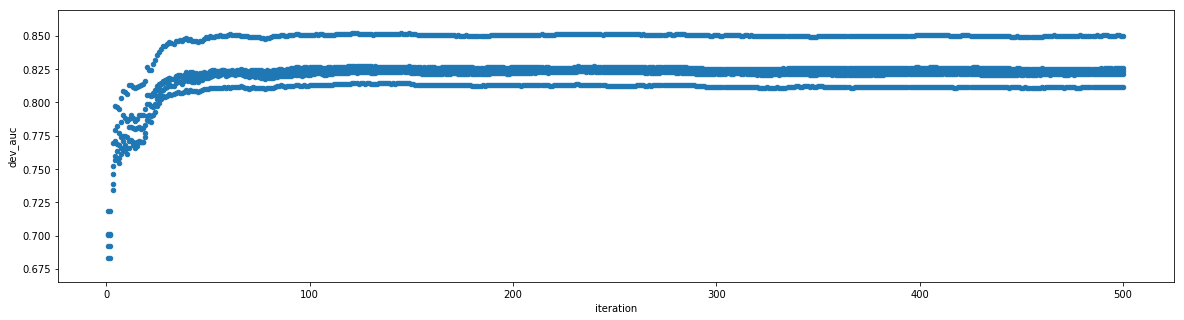

In [14]:
single_origin.plot(x='iteration', y='dev_auc', kind='scatter');

#### other seeds

In [15]:
seeds = unfold_iterations(read_json_log('./experiments/single-point-seed.log'))

In [16]:
seeds.dev_auc.describe()

count    250000.000000
mean          0.750143
std           0.014415
min           0.511817
25%           0.741432
50%           0.747809
75%           0.759159
max           0.789201
Name: dev_auc, dtype: float64

In [17]:
# TODO this is a golden seed graph

In [18]:
display(shaderdots(pd.concat([single_origin, seeds], sort=True, ignore_index=True), 'iteration', 'dev_auc', 500, 500));

### random parameter set from around

In [19]:
single_random = unfold_iterations(read_json_log('./experiments/single-point-one.log'))

In [20]:
single_random.filter(regex='^param_').iloc[0]

param_bagging_fraction                                                   0.503152
param_bagging_freq                                                            187
param_bin_construct_sample_cnt                                               2329
param_boost_from_average                                                    False
param_boosting                                                               gbdt
param_cat_l2                                                          1.41256e-05
param_cat_smooth                                                      4.71823e+06
param_device_type                                                             cpu
param_eval_at                                                     [10, 100, 1000]
param_feature_fraction                                                   0.562393
param_is_unbalance                                                           True
param_lambda_l1                                                           46.6431
param_lambda_l2 

In [21]:
display(shaderdots(single_random, 'iteration', 'dev_auc', 500, 500));

In [22]:
display(shaderdots(single_random, 'iteration', 'dev_binary_logloss', 500, 500));